In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.optimize import curve_fit
Numx, Numy, x_name,y_name, name= 21, 15, 'BP-RP, mag','G, mag','alpha'

In [2]:
def reading(file):
    data = pd.read_csv(file, delimiter=';', header=None)
    data.rename(columns = {Numx : x_name, Numy : y_name}, inplace=True)
    data = data.apply(pd.to_numeric, errors='coerce')
    data.index = pd.RangeIndex(len(data.index))
    return data

In [3]:
data_singles = reading('NGC2516_100m_selected_parallax_0.2_pm_inRA_1.5_pm_inDEC_1.5_CMD_cutted_18.6811_CMD_separated_singles.txt')    
data_binaries = reading ('NGC2516_100m_selected_parallax_0.2_pm_inRA_1.5_pm_inDEC_1.5_CMD_cutted_18.6811_CMD_separated_binaries.txt')
data_singles = data_singles[data_singles['G, mag']<=18]
data_binaries = data_binaries[data_binaries['G, mag']<=18]

In [4]:
delta = 15

In [5]:
# fix start point!!!
data_singles['bin'] = pd.cut(bins=np.linspace(data_binaries['G, mag'].min(), data_singles['G, mag'].max() , delta + 1), x=data_singles['G, mag'],include_lowest=True) 
data_binaries['bin'] = pd.cut(bins=np.linspace(data_binaries['G, mag'].min(), data_singles['G, mag'].max() , delta + 1), x=data_binaries['G, mag'],include_lowest=True) 

In [6]:
step = (data_singles['G, mag'].max() - data_singles['G, mag'].min()) / delta
alpha = pd.DataFrame(data = {'G, mag' : np.linspace(data_binaries['G, mag'].min(), data_singles['G, mag'].max(), num = delta + 1, dtype=None)+step/2}).drop(delta)
alpha['alpha'] = data_binaries.groupby('bin')['G, mag'].count().get_values()/(data_singles.groupby('bin')['G, mag'].count().get_values() + data_binaries.groupby('bin')['G, mag'].count().get_values())

In [7]:
def f(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [8]:
popt, pcov = curve_fit(f, alpha['G, mag'], alpha['alpha'])


In [9]:
popt

array([-1.17272640e-03,  5.66931188e-02, -8.79953611e-01,  4.55435800e+00])

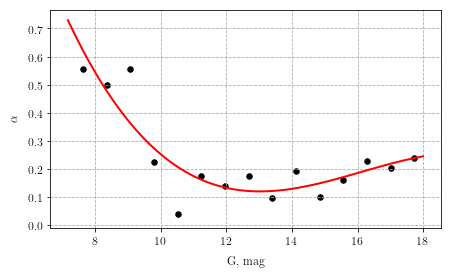

In [24]:
fig, ax = plt.subplots(figsize=(7,4))

plt.rcParams.update({'font.size': 12})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax.scatter(alpha['G, mag'] , alpha['alpha'] , c ='black', s=30)
ax.plot(np.linspace(data_binaries['G, mag'].min(), data_singles['G, mag'].max(), num = 100), f(np.linspace(data_binaries['G, mag'].min(), data_singles['G, mag'].max(), num = 100), *popt), c = 'red', lw = 2)
ax.grid(c='#aaaaaa', ls='--') 
locs, labels = plt.yticks()
locs, labels = plt.xticks()
plt.xlabel(r"G, mag", labelpad=8)
plt.ylabel(r"$\alpha$", labelpad=8)
ax.tick_params(axis='both', which='major')
plt.savefig("alpha_dist.pdf", dpi = 200, bbox_inches = 'tight')

In [57]:
popt

array([-1.18173817e-03,  5.70107747e-02, -8.83567296e-01,  4.56760440e+00])

In [58]:
alpha['alpha'].mean()

0.23854260236180463